In [56]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [58]:
file_path = 'Students _Performance _Prediction.csv'
df = pd.read_csv(file_path)

In [60]:
df.drop(columns=['Student_ID'], inplace=True)

In [62]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [66]:
X = df.drop('Grade', axis=1)  # Features
y = df['Grade']               # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [68]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [70]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.1780821917808219

Confusion Matrix:
 [[2 3 0 1 2 3 3 1]
 [5 4 1 1 0 1 2 0]
 [4 2 1 1 5 0 1 0]
 [1 0 1 0 3 0 0 1]
 [3 2 1 0 1 1 0 0]
 [0 3 1 1 1 0 0 0]
 [1 0 0 0 0 0 4 0]
 [2 0 1 1 0 0 0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.13      0.12        15
           1       0.29      0.29      0.29        14
           2       0.17      0.07      0.10        14
           3       0.00      0.00      0.00         6
           4       0.08      0.12      0.10         8
           5       0.00      0.00      0.00         6
           6       0.40      0.80      0.53         5
           7       0.33      0.20      0.25         5

    accuracy                           0.18        73
   macro avg       0.17      0.20      0.17        73
weighted avg       0.17      0.18      0.16        73



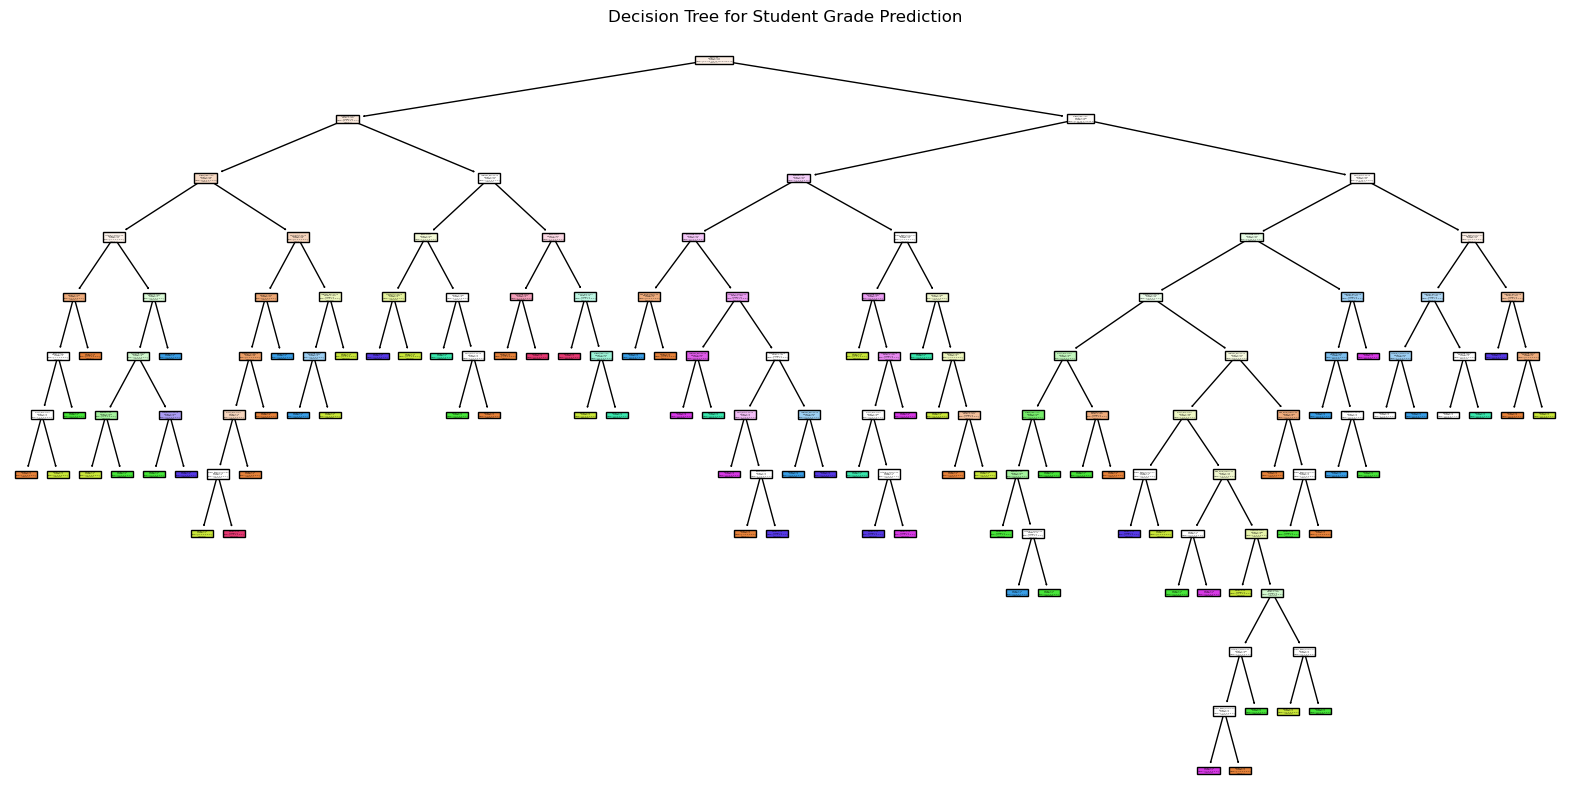

In [15]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['Grade'].classes_)
plt.title("Decision Tree for Student Grade Prediction")
plt.show()